In [1]:
library('DESeq2')

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit, which, which.max, which.min


Attaching package: ‘S4Vectors’

The following objects are maske

In [2]:
rna1 = read.table("../enhancer_data/kellis/raw/GSM1831757_HepG2_ScaleUpDesign1_minP_mRNA_Rep1.counts.txt.gz",
                  sep = '\t', header = 1)
counts1 = rna1['Counts']
head(counts1)

Counts
16
0
0
7
0
0


In [3]:
rna2 = read.table("../enhancer_data/kellis/raw/GSM1831758_HepG2_ScaleUpDesign1_minP_mRNA_Rep2.counts.txt.gz",
                  sep = '\t', header = 1, row.names = 'ID')
counts2 = rna2['Counts']
head(counts2)

,Counts
H1hesc_1_0_0_chr20_30310735,165
H1hesc_1_0_1_chr20_30310735,13
H1hesc_1_0_2_chr20_30310735,0
H1hesc_1_0_3_chr20_30310735,0
H1hesc_1_0_4_chr20_30310735,0
H1hesc_1_0_5_chr20_30310735,1


In [17]:
dna = read.table("../enhancer_data/kellis/raw/GSM1831773_ScaleUpDesign1_minP_Plasmid.counts.txt.gz",
                  sep = '\t', header = 1, row.names = 'ID')
head(dna)

,Sequence,Tags,Counts
H1hesc_1_0_0_chr20_30310735,GGGAGCCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCAC,CTAAGTGGTT,104
H1hesc_1_0_1_chr20_30310735,CCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCC,CTTTTGGGCA,15
H1hesc_1_0_2_chr20_30310735,AAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGC,TACGACCAGA,1
H1hesc_1_0_3_chr20_30310735,GACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCC,ACTCAATCAG,8
H1hesc_1_0_4_chr20_30310735,AGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCCGCCTC,AGCGTACAGA,7
H1hesc_1_0_5_chr20_30310735,TTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCCGCCTCCTACT,CAAGTTTTAC,7


In [4]:
head(rna2)

,Sequence,Tags,Counts
H1hesc_1_0_0_chr20_30310735,GGGAGCCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCAC,CTAAGTGGTT,165
H1hesc_1_0_1_chr20_30310735,CCCAGAAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCC,CTTTTGGGCA,13
H1hesc_1_0_2_chr20_30310735,AAGGCGACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGC,TACGACCAGA,0
H1hesc_1_0_3_chr20_30310735,GACACAGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCC,ACTCAATCAG,0
H1hesc_1_0_4_chr20_30310735,AGGAATTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCCGCCTC,AGCGTACAGA,0
H1hesc_1_0_5_chr20_30310735,TTGCGAAGCTCAGGAACCAGCCCCCTCGCTTGCTTCCTCCTCCATCGCCCGGATCGAGGGCGGCCGCTCCGCAGCCGCGGCCTCCTGCCACCCGGGAGCCCAGCCCCCTCTCTCTTGCACGCCCCTTGGCTCTCCGCCTCCTACT,CAAGTTTTAC,1


In [5]:
rna2$Counts1 <- rna1$Counts
rna2$Counts2 <- rna2$Counts
rna2$Counts <- NULL
rna2$Sequence <- NULL
rna2$Tags <-NULL

In [24]:
rna2$Counts3 <- dna$Counts
colData <- data.frame(row.names = c('Counts1', 'Counts2', 'Counts3'))
colData['condition'] = c('rna', 'rna', 'dna')
colData['type'] = c('single-read', 'single-read', 'single-read')
colData

,condition,type
Counts1,rna,single-read
Counts2,rna,single-read
Counts3,dna,single-read


In [25]:
dds <- DESeqDataSetFromMatrix(countData = rna2,
                                colData = colData,
                                design = ~condition)
dds

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

class: DESeqDataSet 
dim: 243573 3 
metadata(1): version
assays(1): counts
rownames(243573): H1hesc_1_0_0_chr20_30310735
  H1hesc_1_0_1_chr20_30310735 ... Huvec_25_24_29_chr11_118530355
  Huvec_25_24_30_chr11_118530355
rowData names(0):
colnames(3): Counts1 Counts2 Counts3
colData names(2): condition type

In [26]:
dds <- estimateSizeFactors(dds)

In [27]:
dds <- estimateDispersions(dds)

gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates


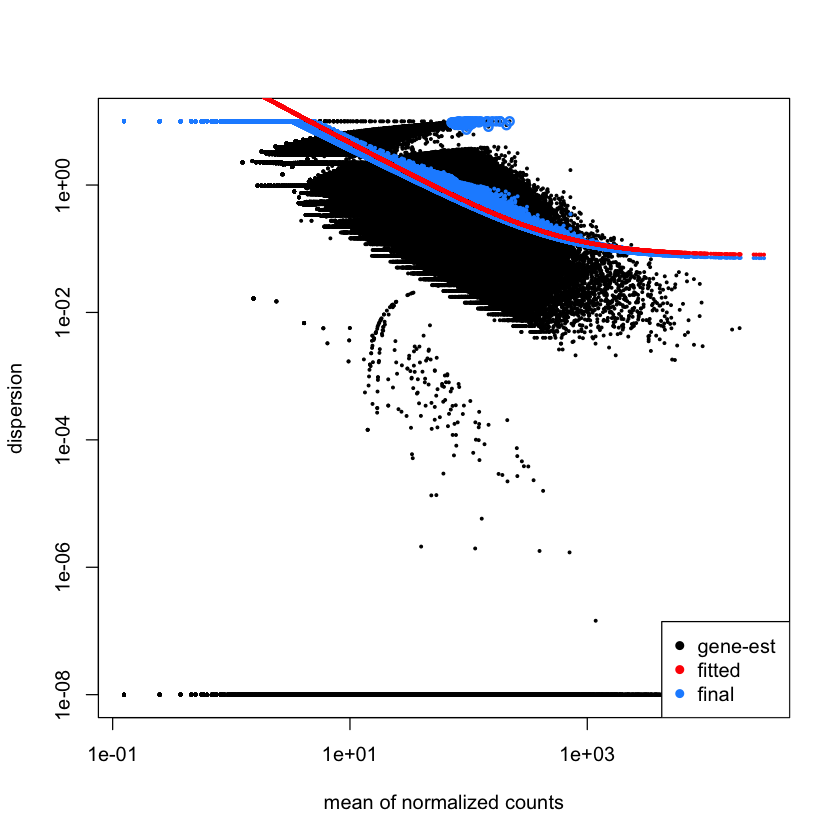

In [28]:
plotDispEsts(dds)

In [36]:
write.table(dispersions(dds), '../enhancer_data/kellis/disp.txt')

In [15]:
head(dispersions(dds))

[1]  0.6367398  7.3233339         NA 10.0000000         NA 10.0000000

In [29]:
dds <- DESeq(dds)
res <- results(dds)

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


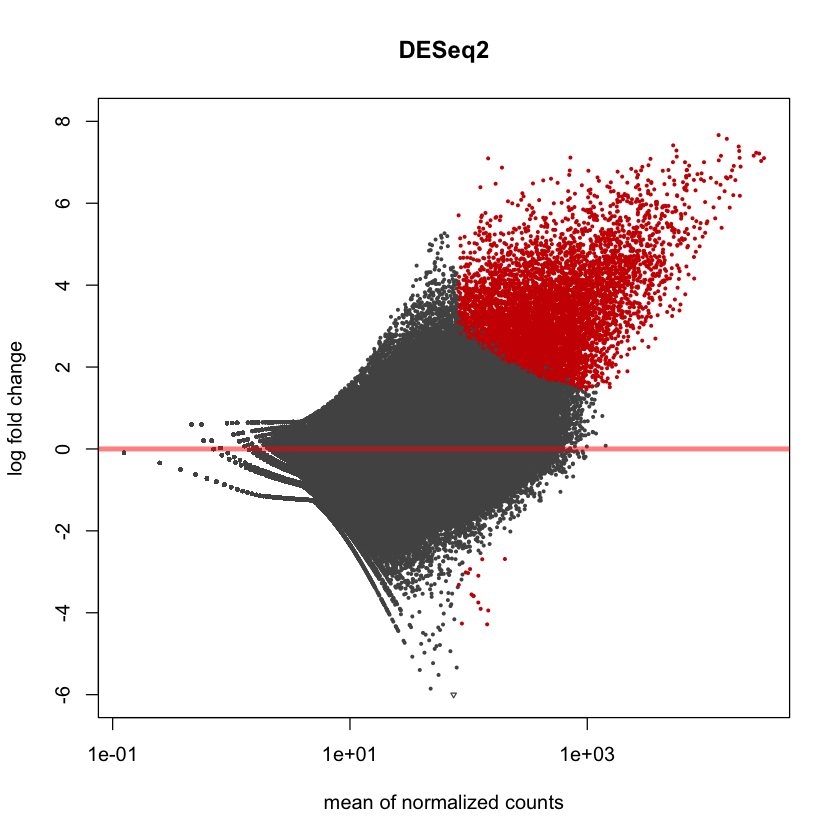

In [33]:
plotMA(res, main="DESeq2", ylim=c(-6,8))

In [37]:
write.table(res, sep = '\t', file =  '../enhancer_data/kellis/deseq.txt')